In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm
from itertools import combinations

from GA_params_class.GeneticAlgorithm import GeneticAlgorithm
from function_module import *

In [2]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expressions = [0, 0.5, 1]
precision = None
verbose = 0
lineages = 10
test_cases = 10

In [4]:
# Run for by_covariance, varying covariance rate

parent_choice_method = 'by_covariance'
range_covariance = np.linspace(-1, 1, test_cases, dtype=float)

total_combinations = len(target_expressions) * len(range_covariance) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for covariance in range_covariance:
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            parent_choice=parent_choice_method, # Dependant variable
            covariance=covariance, # Dependant variable
        )
        for _ in range(lineages):
            current_combination += 1

            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run()
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'parent_choice_method': parent_choice_method,
                    'covariance': covariance,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time) / lineages
                })
        
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            progress_bar.set_postfix({
                "Elapsed": format_time(elapsed_time),
                "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
            })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/parent_choice_methods/by_covariance.csv', index=False)

Processing combinations: 100%|██████████| 300/300 [14:45<00:00,  2.95s/it, Elapsed=14.75min, ETA=0.00s]  


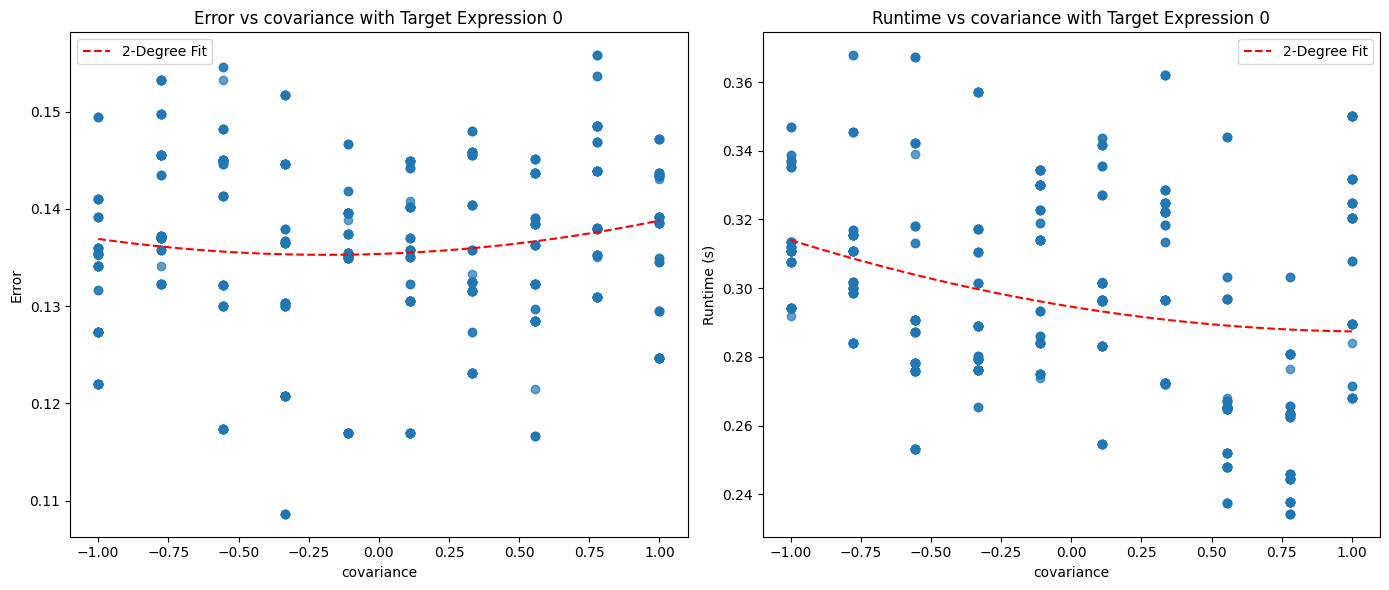

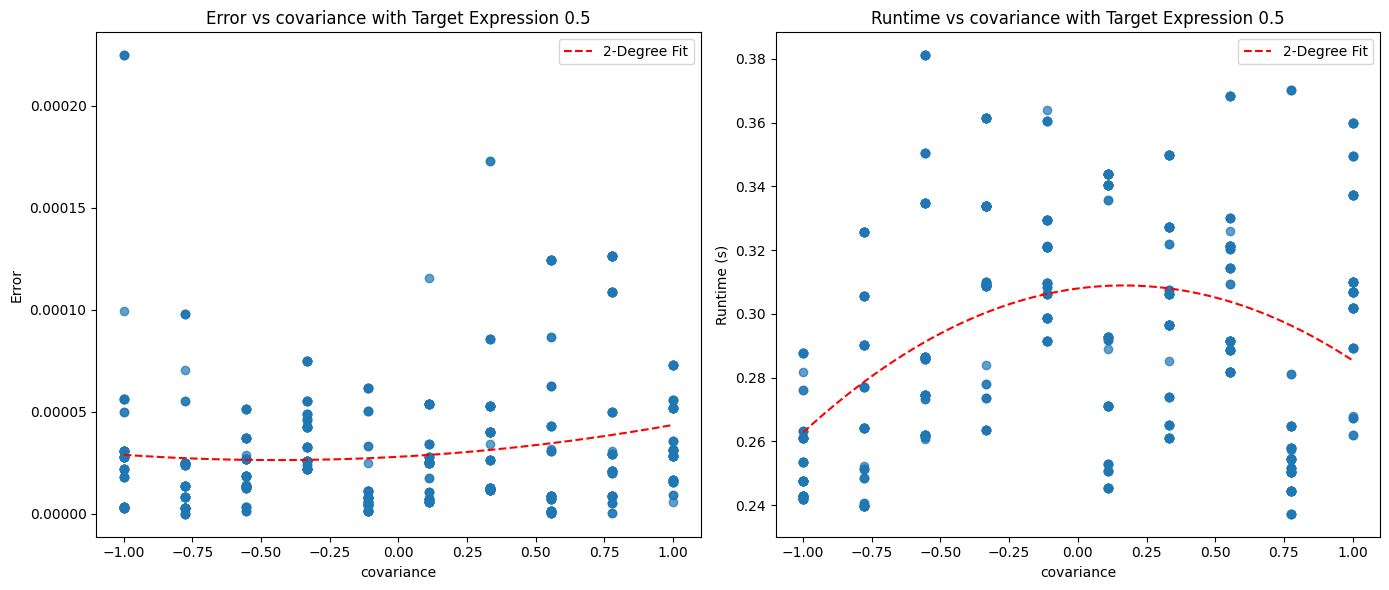

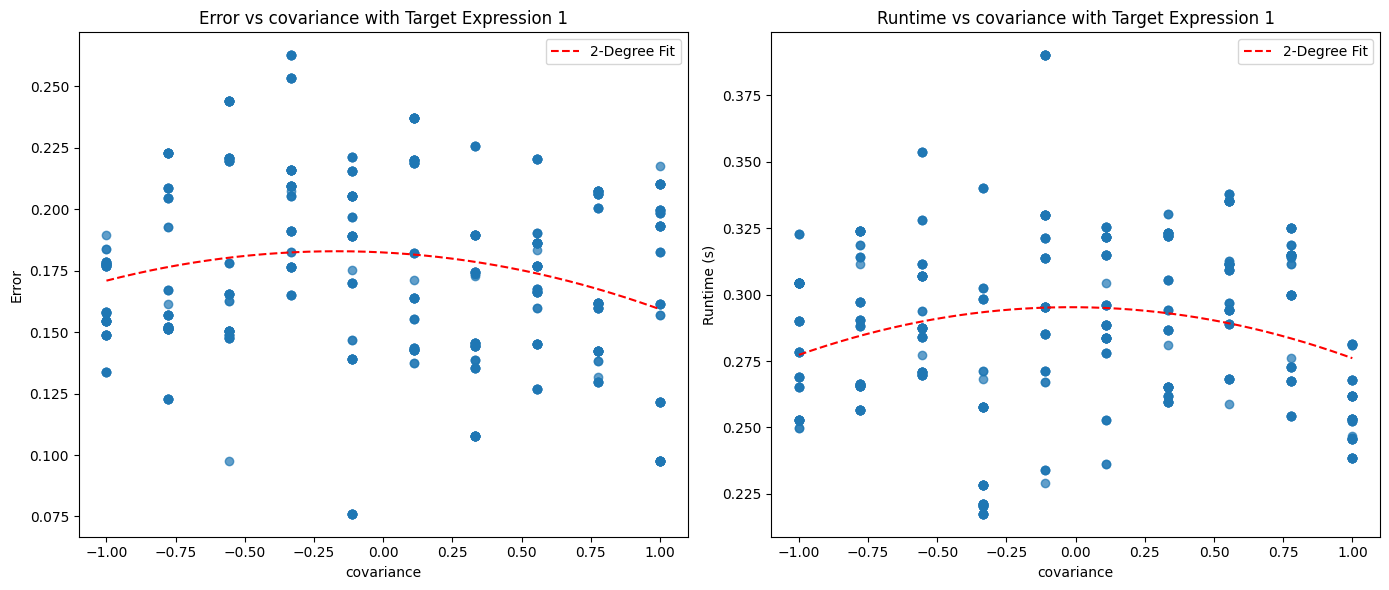

In [5]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'covariance', polynomial_degree=2)

In [ ]:
# Vary covariance rate and generational covariance alpha

parent_choice_method = 'by_covariance'
range_covariance = np.linspace(-1, 1, test_cases, dtype=float)
range_generational_covariance_alpha = np.linspace(0, 1, test_cases, dtype=float)

total_combinations = len(target_expressions) * len(range_covariance) * len(range_generational_covariance_alpha) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for covariance in range_covariance:
        for generational_covariance_alpha in range_generational_covariance_alpha:
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                precision=precision,
                verbose=verbose,
                parent_choice=parent_choice_method, # Dependant variable
                covariance=covariance, # Dependant variable
                generational_covariance_alpha=generational_covariance_alpha, # Dependant variable
            )
            for _ in range(lineages):
                current_combination += 1

                # Time the run
                start_time = time.time()
                best_sequences, best_predictions = ga.run()
                end_time = time.time()

                # Record the results
                for sequence, prediction in zip(best_sequences, best_predictions):
                    results.append({
                        'target_expression': target_expression,
                        'parent_choice_method' : parent_choice_method,
                        'covariance': covariance,
                        'generational_covariance_alpha': generational_covariance_alpha,
                        'error': abs(prediction - target_expression),
                        'run_time': (end_time - start_time) / lineages
                    })
            
                # Update progress bar
                progress_bar.update(1)
                elapsed_time = time.time() - initial_time
                progress_bar.set_postfix({
                    "Elapsed": format_time(elapsed_time),
                    "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
                })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/parent_choice_methods/by_covariance_generational.csv', index=False)

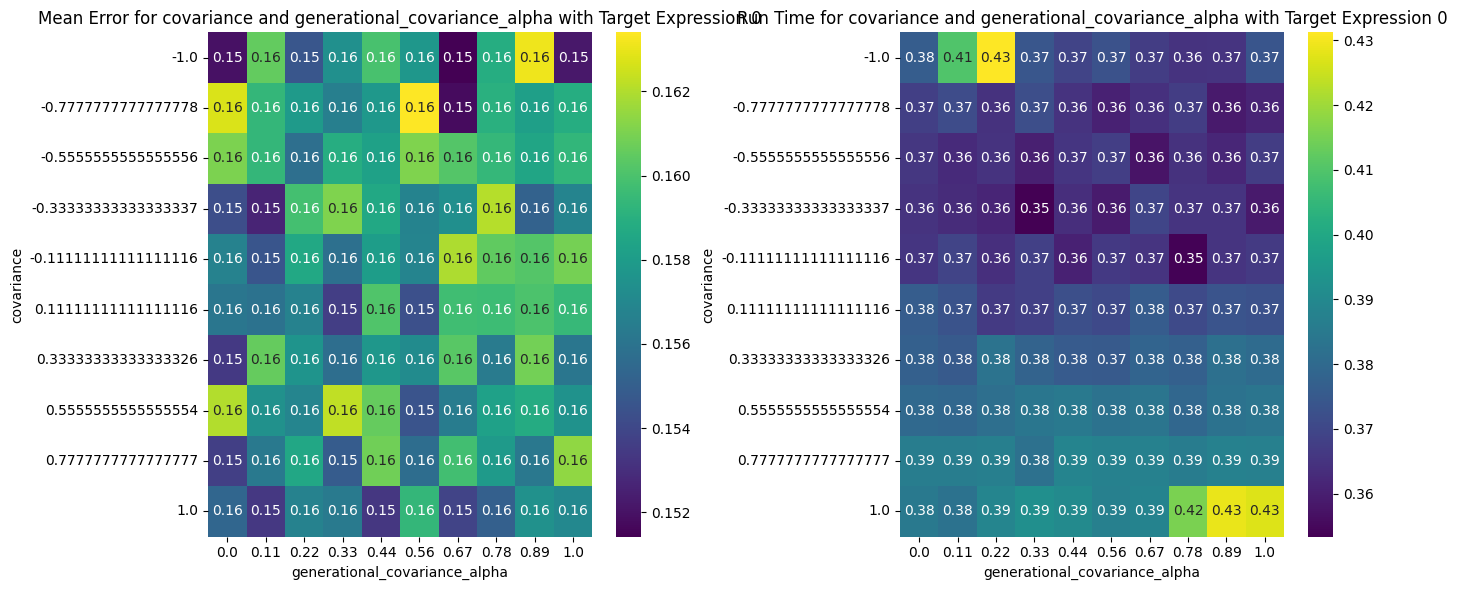

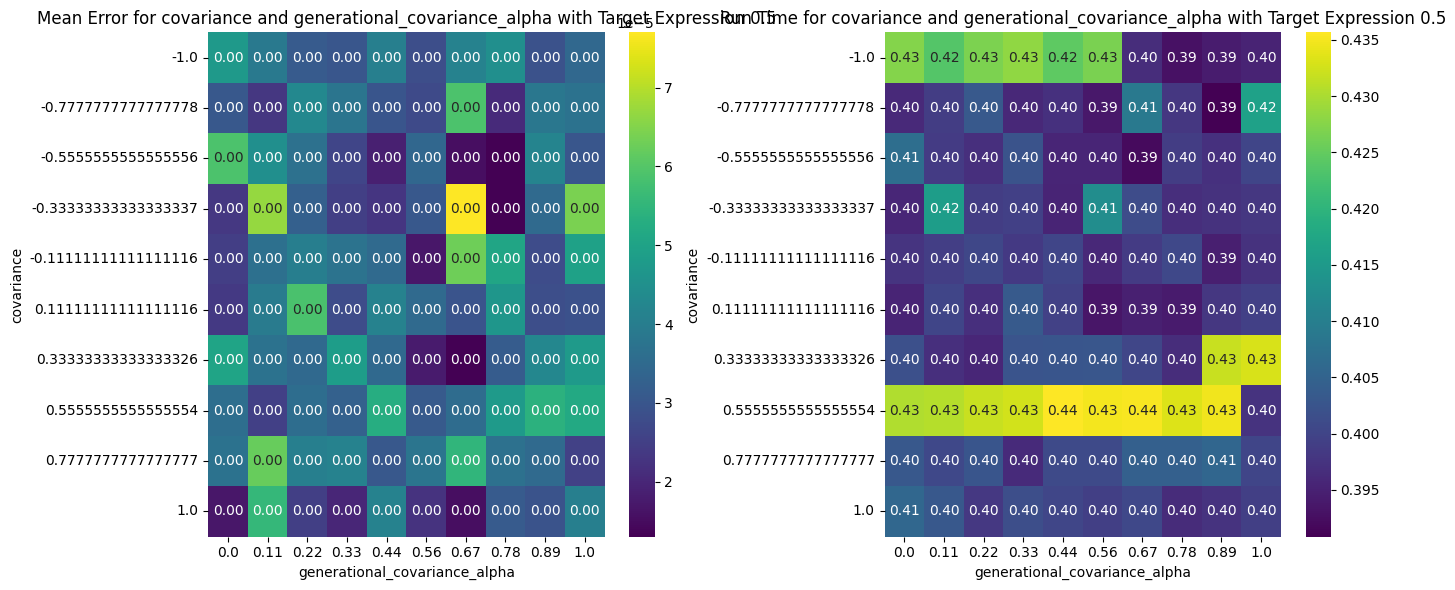

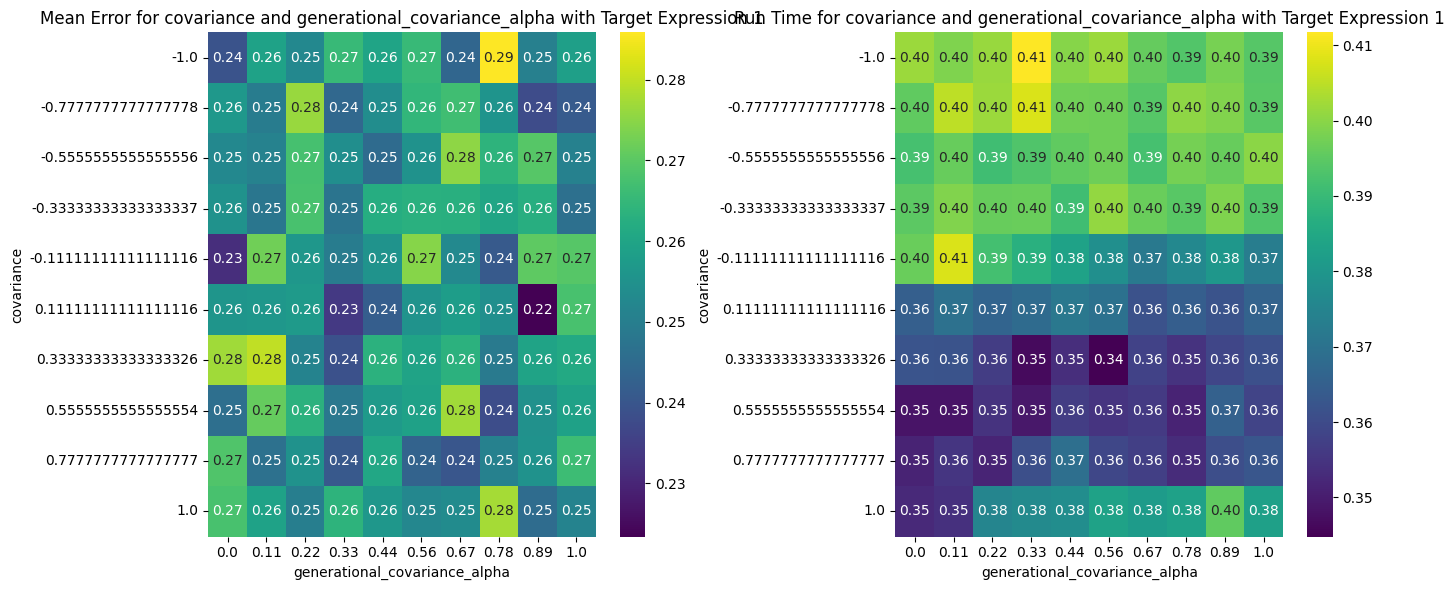

In [6]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'covariance', 'generational_covariance_alpha')

In [7]:
# Run distribution for all other ParentChoice methods
parent_choice_methods = ['by_order', 'without_replacement', 'with_replacement', 'by_covariance']

total_combinations = len(target_expressions) * len(parent_choice_methods) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for parent_choice_method in parent_choice_methods:
        if parent_choice_method == 'by_covariance':
            covariance = 1
        else:
            covariance = 0
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            parent_choice=parent_choice_method, # Dependant variable
            covariance=covariance, # Dependant variable
        )
        for _ in range(lineages):
            current_combination += 1

            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run()
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'parent_choice_method': parent_choice_method,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time)
                })
        
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            progress_bar.set_postfix({
                "Elapsed": format_time(elapsed_time),
                "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
            })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/parent_choice_methods/comparison.csv', index=False)

Processing combinations: 100%|██████████| 120/120 [05:48<00:00,  2.91s/it, Elapsed=5.82min, ETA=0.00s] 


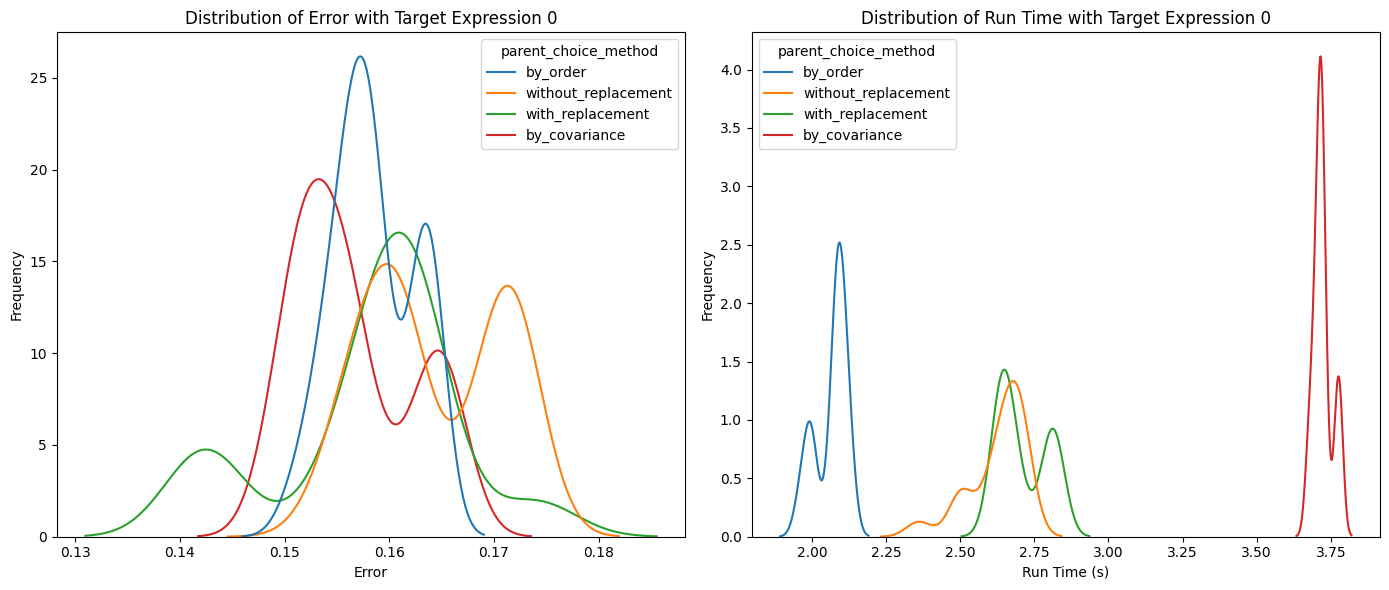

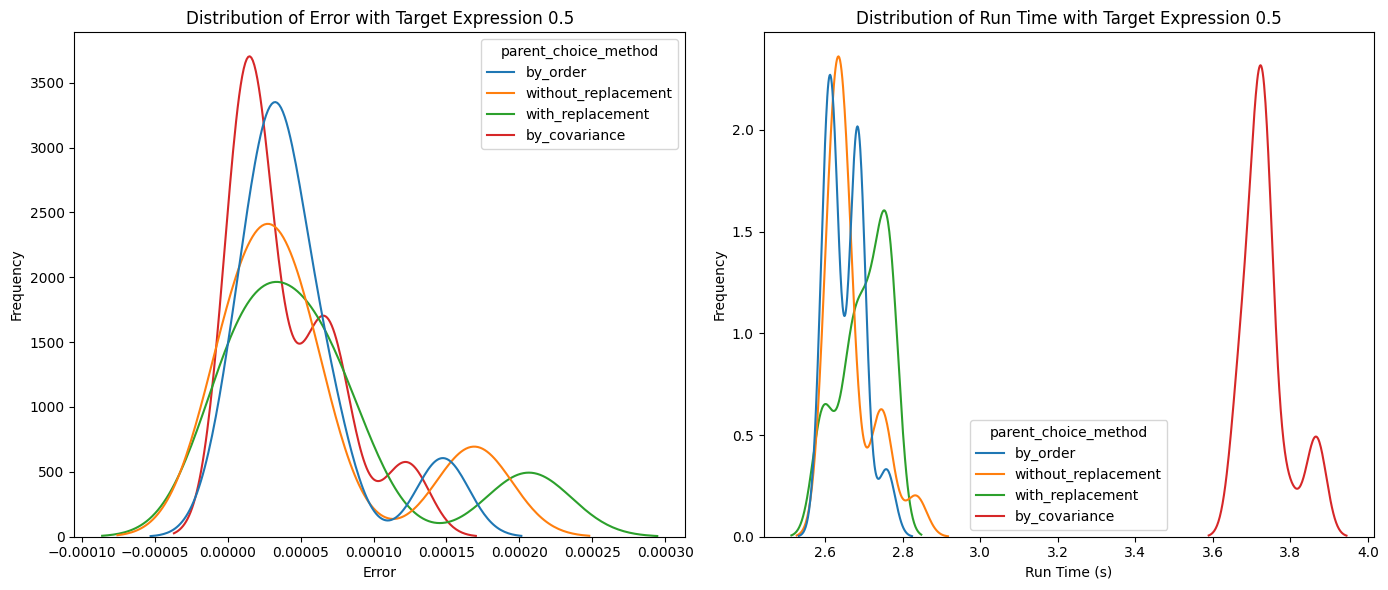

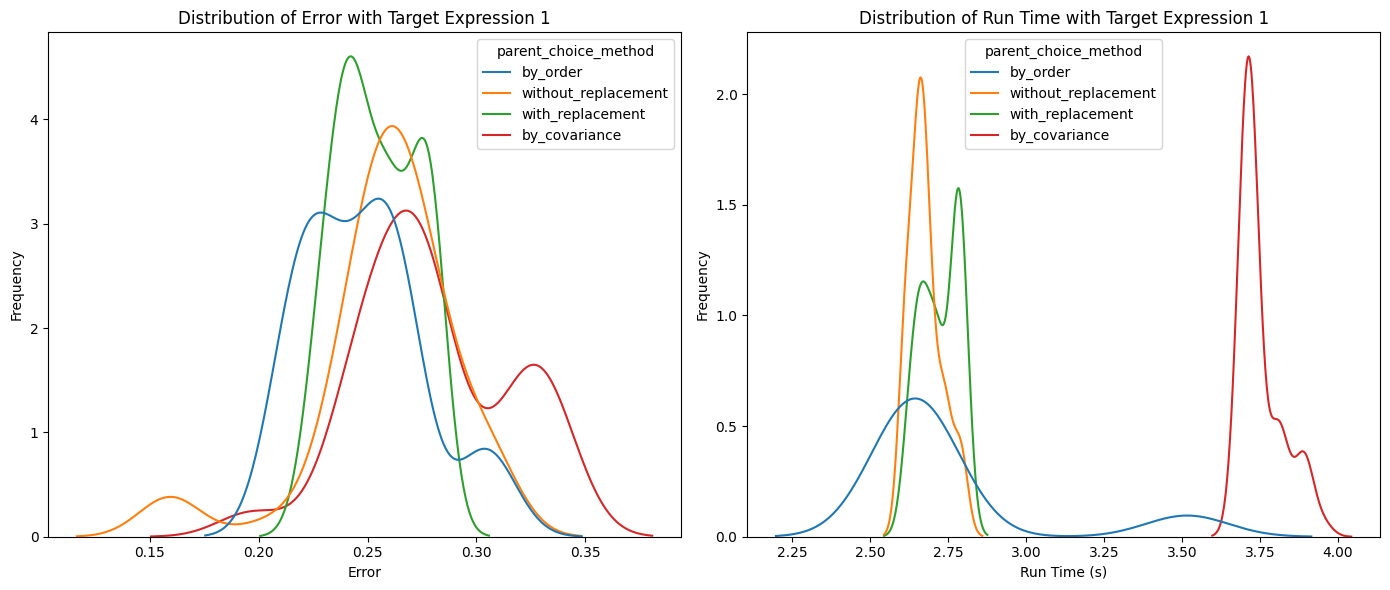

In [8]:
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filter_df, target_expression, 'parent_choice_method')

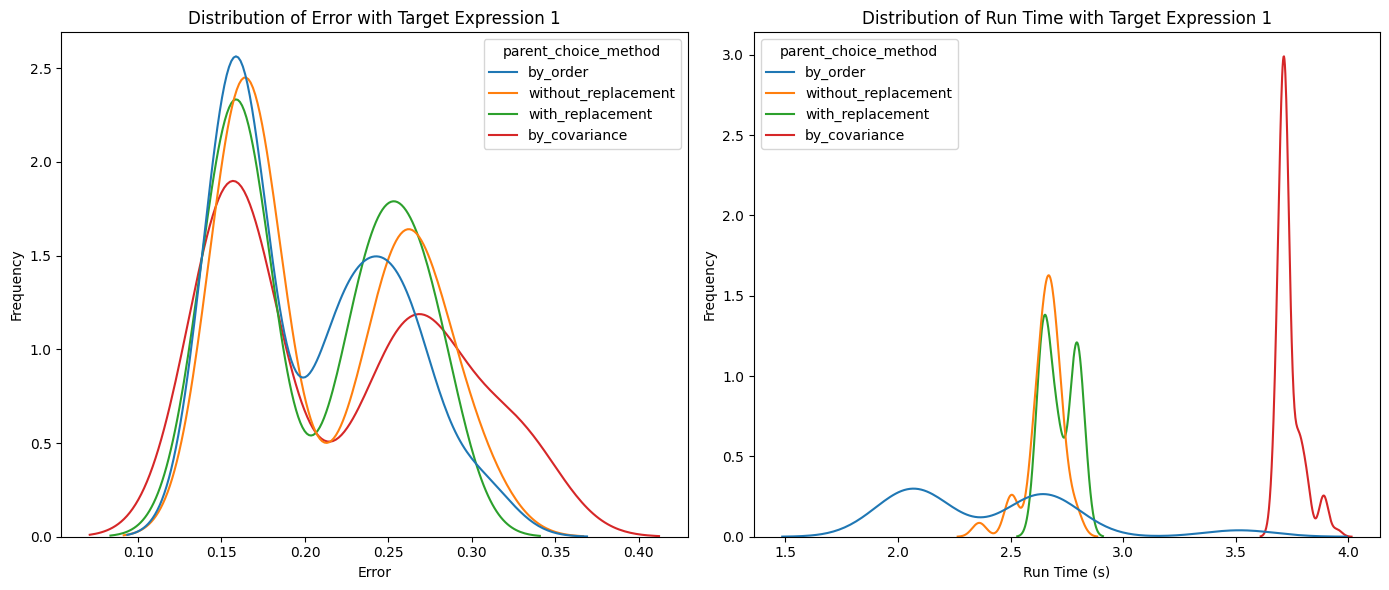

In [9]:
filter_df = results_df[results_df['target_expression'] != 0.5]
distribution_plot(filter_df, target_expression, 'parent_choice_method')